In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("01418363 NLP _ Personal Health Trainer Chatbot Datasets - Datasets Question Class Sorted.csv", dtype={'Class': str})
print(df)

     Class                                           Question
0     1001                                         อาหารที่มี
1     1001                                     อาหารที่มี สูง
2     1001                                        ของกินที่มี
3     1001                                   อาหารที่มีปริมาณ
4     1001                                 อาหารที่ประกอบด้วย
...    ...                                                ...
1656   018  ผู้ที่กำลังตั้งครรภ์จะสามารถดูแลตนเองเพื่อไม่ใ...
1657   018         คุณแม่ที่กำลังตั้งท้องมีความกังกลเกี่ยวกับ
1658   018           ปกติที่อ้วนหลังจากคลอดลูกมาหลายเดือนแล้ว
1659   018   ท้องแล้วหน้าท้องเล็ก อยากรู้ว่ายังเสี่ยงหลังคลอด
1660   018                            ท้องแล้ว จะอ้วนทันทีเลย

[1661 rows x 2 columns]


In [2]:
df.isnull().sum()

Class       0
Question    0
dtype: int64

In [3]:
df = df[df['Class'].str[0] == '2']

print(df)

     Class                                           Question
646   2001    การวางแผนการฝึกออกกำลังกายสำหรับการเพิ่มความสูง
647   2001                                      ทำยังไงให้สูง
648   2001                            อยากสูงออกกำลังกายยังไง
649   2001             ต้องออกกำลังถึงจะทำให้ส่วนสูงเพิ่มขึ้น
650   2001                       อยากเป็นคนสูงต้องออกกำลังกาย
...    ...                                                ...
1315  2017  อุปกรณ์เซฟตี้ที่ควรพวกติดตัวระหว่างการออกกำลังกาย
1316  2017  อุปกรณ์ป้องกันอันตรายที่ช่วยปกป้องตัวเราหากเกิ...
1317  2017  วิธีปฏิบัติหากเกิดเหตุการณ์ไม่คาดฝันระหว่างการ...
1318  2017  จะต้องเตรียมตัว ก่อนไปออกกำลังกายหรือบริหารร่า...
1319  2017  อยากให้แนะนำวิธีการออกกำลังกายที่ทำให้เสี่ยงบา...

[674 rows x 2 columns]


In [4]:
def create_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = " ".join(tokens[i:i + n])
        ngrams.append(ngram)
    return ngrams

In [5]:
def create_ngram_interpolations(tokens, n):
    unigrams = tokens
    ngrams = create_ngrams(tokens, n)
    ngram_interpolations = []

    for i in range(len(unigrams)):
        for j in range(n):
            if i + j < len(unigrams):
                ngram_interpolations.append(" ".join(unigrams[i:i + j + 1]))

    return ngram_interpolations

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from pythainlp.util import dict_trie

words = [   "โควิด", "ตั้งครรภ์", "ตั้งท้อง", "ผลเสีย", "ไม่ปกติ",
            "โอเมก้า 3", "โอเมก้าสาม", "OMEGA 3", "ดีเอสเอ", "DSA", "อีพีเอส", "EPS", "กรดไขมันดีเอสเอ", "กรดไขมันอีพีเอส", "กรดไขมันแอลฟาไลโนเลนิก", "แอลฟาไลโนเลนิก", "กรดไขมัน",
            "โอเมก้า 6", "โอเมก้าหก", "OMEGA 6", "กรดไขมัน", "ไลโนอิกแอซิด", "แกมมา ไลโนเลอิก แอซิด", "LINOLEIC ACID", "GAMMA LINOLEIC ACID",
            "ไนตริกออกไซด์", "ไนตริกออกไซต์", "NITRIC OXIDE", "ไนตริก",
            "วิตามิน", "VITAMIN", "แร่ธาตุ", "MINERAL", "เกลือแร่", "MINERAL SALT",
            "สารอาหาร", "NUTRITION",
            "ไขมันดี", "HDL", "คอเลสเตอรอลดี", "เฮชดีแอล",
            "คาร์โบไฮเดรต", "CARBOHYDRATE",
            "แคลเซียม", "CALCIUM",
            "โปรตีน", "PROTIEN",
            "โฟแลต", "วิตามินบี 9", "วิตามินB9", "วิตามินบีเก้า",
            "ใยอาหาร", "กากใย",
            "ต้านอนุมูลอิสระ", "อนุมูลอิสระ",
            "ธาตุเหล็ก", "เหล็ก"    ]

custom_words_list = set(thai_words())
custom_words_list.update(words)
trie = dict_trie(dict_source=custom_words_list)

engine = "newmm"
data = df['Question'].astype(str).apply(word_tokenize, engine=engine, keep_whitespace=False, custom_dict=trie)
y = df['Class']

# Randomly select 'n' rows from the DataFrame
random_rows = data.sample(30)

# Iterate through and print the selected rows
for row in random_rows:
    print(row)

['เป็น', 'คน', 'สูงวัย', 'ที่', 'อยาก', 'ให้', 'ร่างกาย', 'แข็งแรง']
['ค่า', 'BMI', 'สูง', 'กว่า', 'เกณฑ์', 'จะ', 'ต้อง', 'ออกกำลังกาย', 'ให้', 'มัน', 'กลับมา', 'เป็น', 'สมส่วน']
['อุปกรณ์', 'ซัพพอร์ต', 'ร่างกาย', 'เพื่อ', 'ลด', 'ความรุนแรง', 'หาก', 'เกิด', 'อุบัติเหตุ']
['อยากได้', 'กล้าม', 'หน้าอก', 'เพิ่ม', 'เพิ่ม', 'ควร', 'มี', 'แพลน', 'การออกกำลังกาย']
['คำแนะนำ', 'เพื่อ', 'ลด', 'การ', 'เกิด', 'อุบัติเหตุ', 'ระหว่าง', 'การออกกำลังกาย']
['วิธี', 'ปฏิบัติ', 'หาก', 'เกิด', 'เหตุการณ์', 'ไม่', 'คาดฝัน', 'ระหว่าง', 'การ', 'ออกกำลัง']
['มี', 'ท่า', 'บริหาร', 'รึ', 'ท่า', 'ออกกำลังกาย', 'ที่', 'ช่วย', 'แก้', 'อาการ', 'ปวด', 'ต้นคอ', 'และ', 'บ่า']
['ไม่ค่อย', 'ได้', 'ใช้', 'กล้ามเนื้อ', 'หลัง', 'เลย', 'กลัว', 'ว่า', 'จะ', 'ไม่', 'แข็งแรง', 'แนะนำ', 'การ', 'ออกกำลัง', 'บริเวณ', 'นี้']
['BMI', 'สูง', 'มาก', 'ต้องการ', 'ตาราง', 'การออกกำลังกาย', 'ด่วน', 'เพื่อให้', 'มัน', 'ลด', 'ลงมา']
['เป็น', 'คน', 'ที่', 'ไม่', 'สามารถ', 'ทำกิจกรรม', 'หนัก', 'ได้', 'เพราะ', 'ร่างกาย', 'ไม่', 'มี', 'ความอด

In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
X_tokenized = tokenizer.texts_to_sequences(data)
print(X_tokenized[100])

[4, 68, 47, 354, 28, 2]


In [8]:
from keras.preprocessing.sequence import pad_sequences

texts_to_sequences = tokenizer.texts_to_sequences(data)
maxlen = max([len(s) for s in texts_to_sequences])
print("max sentence's length = " , maxlen)
padded_sequences = pad_sequences(texts_to_sequences, maxlen=maxlen, padding='post', truncating='pre', value=0)
print("Padded Sequence:\n", padded_sequences[0])

max sentence's length =  18
Padded Sequence:
 [  6 283 160   2  21   6  18 102   0   0   0   0   0   0   0   0   0   0]


# Deep Learning

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dropout, BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler, Callback
import tensorflow as tf
import keras

In [10]:
input_text_list = [
    "อยากรู้ว่า BMI คืออะไรเล่าให้ฟังหน่อย",
    "จากเกณฑ์ของ bmi ถ้าไม่เป็นตามนั้นจะไม่ดียังไง",
    "น้ำหนัก 80 สูง 150",
    "เป็นโควิดเมื่อวานอนาคตจะอ้วนไหม",
    "คำนวณ BMI",
    "BMI มากเกินไปผลเสียคืออะไร",
    "ตั้งครรภ์หลังคลอดจะอ้วนไหม",
    "คลอดลูกแล้วจะยังอ้วนมั้ย"
    "โควิดทำให้เราอ้วนขึ้นได้จริงหรอ",
    "มีพ่อกับแม่อ้วนตอนที่ท้องลูกจะอ้วยตามมั้ย",
    "เคี้ยวอาหารแบบไหนที่ทำให้อ้วน",
    "กินเร็วจะอ้วนจริงหรอ",
    "บุคคลในบ้านมีประวัติโรคอ้วนในทางพันธุกรรม ผมมีสิทธิ์อ้วนมั้ย",
    "กินข้าวไม่เป็นเวลา",
    "กินแต่ขนมหวานทั้งวัน",
    "เคี้ยวอาหารไม่เพียงพอ",
    "กินข้าวไม่เป็นเวลา แถมเป็นโรคซึมเศร้า เคี้ยวอาหารไม่ละเอียด เคยติดโควิดมาก่อน จะอ้วนมั้ย"
]

In [11]:
import random
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, SGD

learning_rate = 0.001

# random_state = random.randint(0, 1e4)

random_state = 454911
print(random_state)

epochs = 90
dense = 100
test_size = 0.2
output_dim = 50
ngram = 2
folder_name = "class2"

454911


In [12]:
def model_type(model_type, vocab_size, num_classes, maxlen, output_dim, dense, optimizer):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=maxlen))

    if model_type == "FC":
        model.add(Flatten())
        model.add(Dense(dense, activation='relu'))
    elif model_type == "RNN":
        model.add(SimpleRNN(512, return_sequences=True))
        model.add(Dropout(0.5))
        model.add(BatchNormalization())
        model.add(SimpleRNN(256))
    elif model_type == "LSTM":
        model.add(LSTM(512, return_sequences=True))
        model.add(Dropout(0.5))
        model.add(BatchNormalization())
        model.add(LSTM(256))
    elif model_type == "bi-LSTM":
        model.add(Bidirectional(LSTM(512, return_sequences=True)))
        model.add(Dropout(0.5))
        model.add(BatchNormalization())
        model.add(Bidirectional(LSTM(256)))
    
    # Increase complexity by adding more layers or units
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [13]:
class LearningRateTracker(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_lr = float(keras.backend.get_value(self.model.optimizer.lr))
        print(f'Epoch {epoch + 1}/{epochs}, Learning Rate: {current_lr:.6f}')

In [14]:
def graph_plot(X_train, X_test, y_train_onehot, y_test, y_test_onehot, model, epochs, class_labels, optimizer):
    def lr_schedule(epoch, lr):
        if epoch < 5:
            return lr
        else:
            return lr * tf.math.exp(-0.1)
        
    lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)
    
    # Create a History callback to store training history
    history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=epochs, callbacks=[lr_scheduler], verbose=0)

    # Plot both training and testing learning rates
    plt.figure(figsize=(10, 5))
    plt.plot(history.epoch, history.history['lr'], label='Learning Rate', marker='', color='b')
    plt.plot(history.epoch, [lr_schedule(e, optimizer.learning_rate) for e in history.epoch], label='Scheduled Learning Rate', marker='', color='r')
    plt.title('Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot both training and testing accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy', marker='', color='b')
    plt.plot(history.epoch, history.history['val_accuracy'], label='Testing Accuracy', marker='', color='r')
    plt.title('Training and Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    y_test_predict_onehot = model.predict(X_test)

    # Convert predictions back to labels
    y_test_predicted_label = [class_labels[idx] for idx in np.argmax(y_test_predict_onehot, axis=1)]

    # Use class_labels for the class names
    class_names = class_labels

    confusion_matrix_test = confusion_matrix(y_test, y_test_predicted_label, labels=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Test Set)')
    plt.show()

In [15]:
def create_optimizer(optimizer_type, learning_rate):
    if optimizer_type == "Adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_type == "Nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    elif optimizer_type == "Adamax":
        optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
    elif optimizer_type == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_type == "RMSprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer_type. Supported types: Adam, Nadam, Adamax, SGD, RMSprop")

    return optimizer

In [16]:
def train_test_model(model_type_input, optimizer_type, grouping_method, is_save):
    print(">" * 20 + " " * 10 + optimizer_type + " " * 10 + "<" * 20, end="\n\n")
    
    data = df['Question'].astype(str).apply(word_tokenize, engine=engine, keep_whitespace=False, custom_dict=trie)
    y = df['Class']
    
    if (grouping_method == "Unigram"):
        data = data.apply(lambda x: create_ngrams(x, 1))
    elif (grouping_method == "Bigram"):
        data = data.apply(lambda x: create_ngrams(x, 2))
    elif (grouping_method == "Bigram Interpolation"):
        data = data.apply(lambda x: create_ngram_interpolations(x, ngram))
        
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data)
    X_tokenized = tokenizer.texts_to_sequences(data)
        
    maxlen = max([len(s) for s in X_tokenized])
    X_padded_sequences = pad_sequences(X_tokenized, maxlen=maxlen, padding='post', truncating='pre', value=0)

    X_train, X_test, y_train, y_test = train_test_split(X_padded_sequences, y, test_size=test_size, random_state=random_state)

    # Ensure the vocabulary size
    vocab_size = len(tokenizer.word_index) + 1
    print("Vocabulary Size:", vocab_size)  # Print the vocabulary size for verification
    
    # Make sure your class labels are integers ranging from 0 to num_classes - 1
    class_labels = sorted(y.unique())
    num_classes = len(class_labels)
    
    # Build the optimizer with the model's variables
    optimizer = create_optimizer(optimizer_type, learning_rate)
    
    # Modify the model for multi-class classification
    model = model_type(model_type_input, vocab_size, num_classes, maxlen, output_dim, dense, optimizer)

    # Map class labels to integers
    class_to_index = {label: idx for idx, label in enumerate(class_labels)}
    y_train_int = y_train.map(class_to_index)
    y_test_int = y_test.map(class_to_index)
    
    # Convert labels to one-hot encoding
    y_train_onehot = to_categorical(y_train_int, num_classes)
    y_test_onehot = to_categorical(y_test_int, num_classes)

    model.summary()
    
    graph_plot(X_train, X_test, y_train_onehot, y_test, y_test_onehot, model, epochs, class_labels, optimizer)
    
    # Calculate and print overall model statistics
    loss, accuracy = model.evaluate(X_test, y_test_onehot)
    print("Model Accuracy:", accuracy)
    print("Loss Accuracy:", loss)
    print("\n\n")
    
    print(">" * 20 + " " * 10 + "Testing" + " " * 10 + "<" * 20, end="\n\n")
    
    for input_text in input_text_list:
        print("Input Text:", input_text)

        tokens = word_tokenize(input_text, engine=engine)  # Adjust the engine for Thai tokenization
        unigram = create_ngrams(tokens, 1)

        # Tokenize and pad
        input_text_tokenized = tokenizer.texts_to_sequences([unigram])
        input_text_padded = pad_sequences(input_text_tokenized, maxlen=maxlen, padding='post', truncating='pre', value=0)
        
        criteria_value = {}
        
            
        # Make predictions with the model
        predictions = model.predict(input_text_padded)

        # Convert predictions to class labels
        predicted_class_index = np.argmax(predictions, axis=1)
        predicted_class_label = class_labels[predicted_class_index[0]]

        # Print predictions
        print(f"{model_type_input}: {max(predictions[0])}")

        if max(predictions[0]) >= 0.75:
            print(f"Predicted Class: {predicted_class_label}")
            criteria_value[max(predictions[0]) * accuracy] = predicted_class_label 
        else:
            print("Predicted Class: Can't answer")

        print("------------------------------------------")
        
    if is_save == True:
        save_model_and_resources(model_type_input, model, accuracy, class_labels, maxlen)


### Save Models

In [17]:
def save_model_and_resources(model_name, model, accuracy, class_labels, maxlen):
    tf.keras.models.save_model(
      model, f"{folder_name}/{folder_name}-{model_name}", overwrite=True, include_optimizer=True, save_format=None,
      signatures=None, options=None, save_traces=True)
    save_resources(model_name, model, accuracy, class_labels, maxlen)

### Write Files

In [18]:
import csv
import joblib

def save_resources(model_name, model, accuracy, class_labels, maxlen):
    # Open the CSV file in write mode
    with open(f'{folder_name}/{folder_name}-model-{model_name}-accuracy.csv', mode='w', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)

        # Write the header row
        writer.writerow([model_name, accuracy])

    # Open the CSV file in write mode
    with open(f'{folder_name}/{folder_name}-class-labels.csv', mode='w', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)

        # Write the header row
        writer.writerow(['Class Labels'])
        for value in class_labels:
            writer.writerow([value])

    # Open the CSV file in write mode
    with open(f'{folder_name}/{folder_name}-max-length.csv', mode='w', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)

        # Write the header row
        writer.writerow(['Max Length'])
        writer.writerow([maxlen])

    # Save the tokenizer to a file using joblib
    tokenizer_path = f'{folder_name}/{folder_name}-tokenizer.joblib'
    joblib.dump(tokenizer, tokenizer_path)

## Unigram

In [19]:
grouping_method = "Unigram"

### Fully Connected

In [20]:
model_type_input = "FC"

#### 1. Adam

>>>>>>>>>>>>>>>>>>>>          Adam          <<<<<<<<<<<<<<<<<<<<

Vocabulary Size: 562
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 50)            28100     
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 100)               90100     
                                                                 
 dense_1 (Dense)             (None, 256)               25856     
                                                                 
 dense_2 (Dense)             (None, 11)                2827      
                                                                 
Total params: 146883 (573.76 KB)
Trainable params: 146883 (573.76 KB)
Non-trainable params: 0 (0.00 B

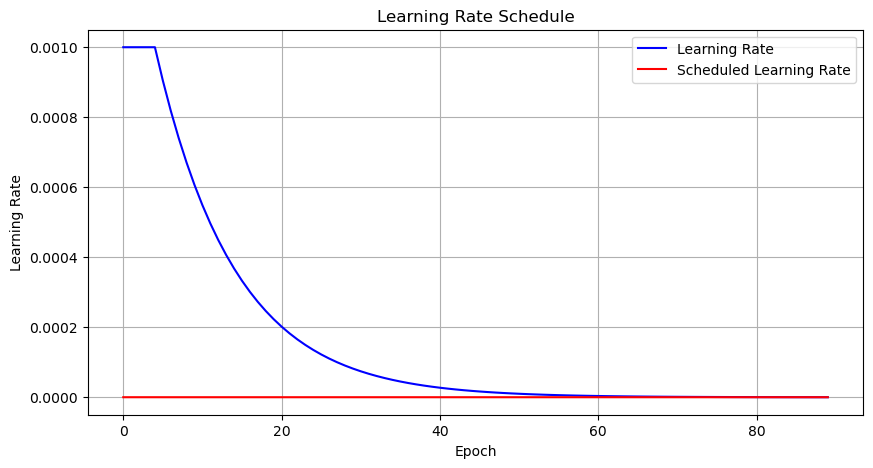

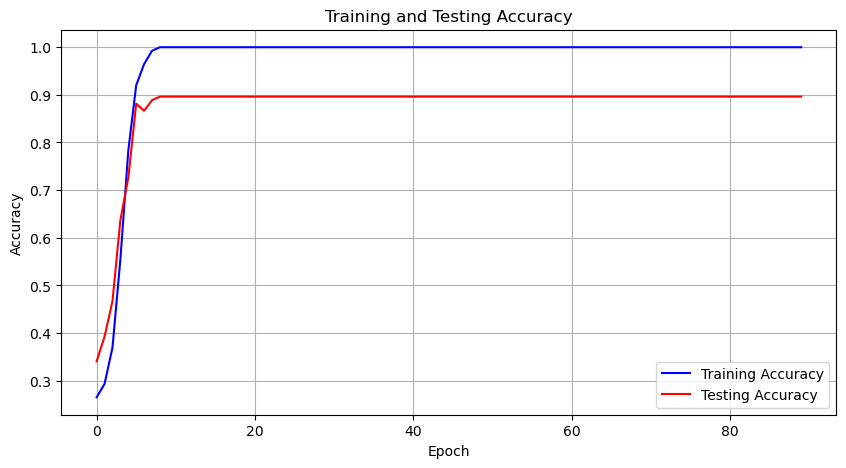

5/5 [==============================] - 0s 5ms/step


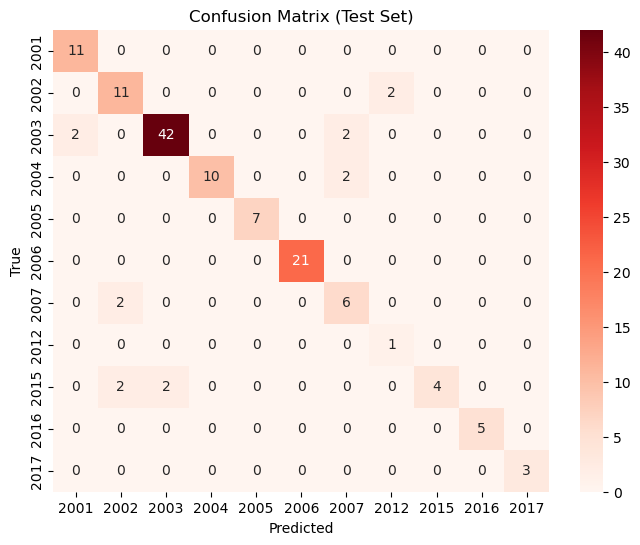

5/5 [==============================] - 0s 10ms/step - loss: 0.3843 - accuracy: 0.8963
Model Accuracy: 0.8962963223457336
Loss Accuracy: 0.3842989206314087



>>>>>>>>>>>>>>>>>>>>          Testing          <<<<<<<<<<<<<<<<<<<<

Input Text: อยากรู้ว่า BMI คืออะไรเล่าให้ฟังหน่อย
1/1 [==============================] - 0s 202ms/step
FC: 0.4717608392238617
Predicted Class: Can't answer
------------------------------------------
Input Text: จากเกณฑ์ของ bmi ถ้าไม่เป็นตามนั้นจะไม่ดียังไง
1/1 [==============================] - 0s 64ms/step
FC: 0.40220731496810913
Predicted Class: Can't answer
------------------------------------------
Input Text: น้ำหนัก 80 สูง 150
1/1 [==============================] - 0s 40ms/step
FC: 0.7254199385643005
Predicted Class: Can't answer
------------------------------------------
Input Text: เป็นโควิดเมื่อวานอนาคตจะอ้วนไหม
1/1 [==============================] - 0s 163ms/step
FC: 0.5073612928390503
Predicted Class: Can't answer
--------------------------------------

INFO:tensorflow:Assets written to: class2/class2-FC\assets


In [21]:
train_test_model(model_type_input, "Adam", grouping_method, True)

### RNN (Recurrent Neural Network)

In [22]:
model_type_input = "RNN"

#### 1. Adam

>>>>>>>>>>>>>>>>>>>>          Adam          <<<<<<<<<<<<<<<<<<<<

Vocabulary Size: 562
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 50)            28100     
                                                                 
 simple_rnn (SimpleRNN)      (None, 18, 512)           288256    
                                                                 
 dropout (Dropout)           (None, 18, 512)           0         
                                                                 
 batch_normalization (Batch  (None, 18, 512)           2048      
 Normalization)                                                  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               196864    
                                                                 
 dense_3 (Dense)             (Non

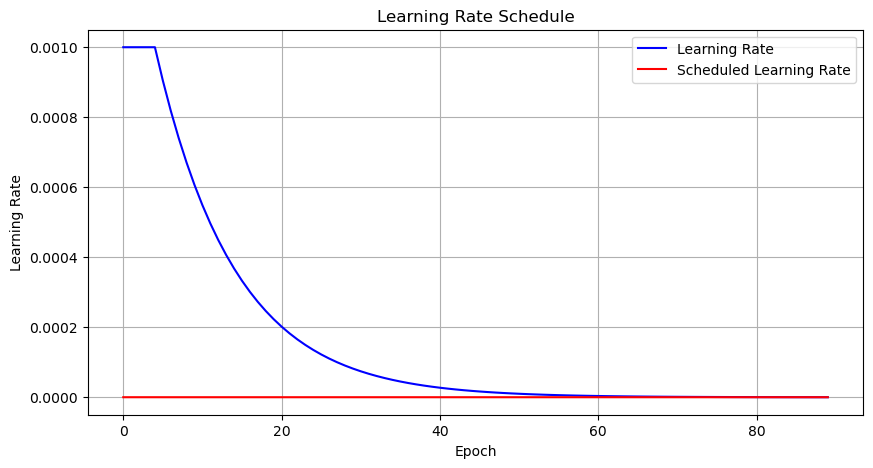

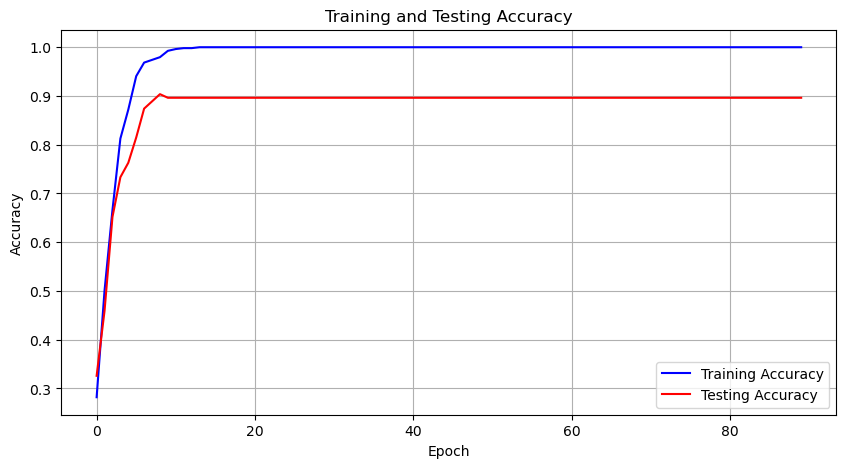

5/5 [==============================] - 1s 24ms/step


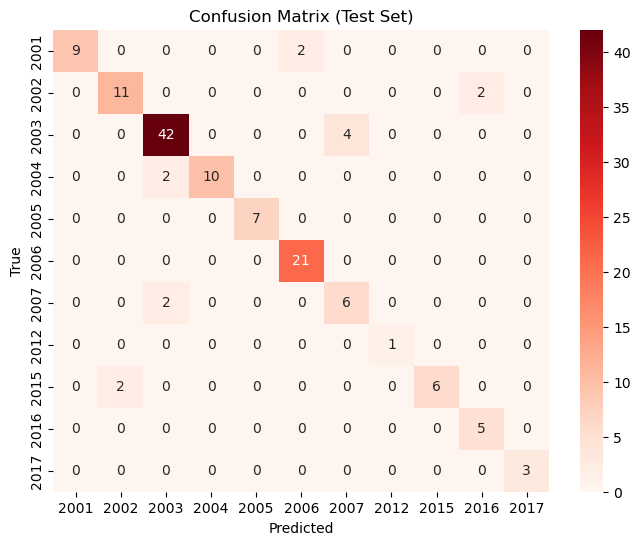

5/5 [==============================] - 0s 24ms/step - loss: 0.6564 - accuracy: 0.8963
Model Accuracy: 0.8962963223457336
Loss Accuracy: 0.6564235687255859



>>>>>>>>>>>>>>>>>>>>          Testing          <<<<<<<<<<<<<<<<<<<<

Input Text: อยากรู้ว่า BMI คืออะไรเล่าให้ฟังหน่อย
1/1 [==============================] - 0s 66ms/step
RNN: 0.6597456336021423
Predicted Class: Can't answer
------------------------------------------
Input Text: จากเกณฑ์ของ bmi ถ้าไม่เป็นตามนั้นจะไม่ดียังไง
1/1 [==============================] - 0s 48ms/step
RNN: 0.9059344530105591
Predicted Class: 2005
------------------------------------------
Input Text: น้ำหนัก 80 สูง 150
1/1 [==============================] - 0s 56ms/step
RNN: 0.9954646229743958
Predicted Class: 2006
------------------------------------------
Input Text: เป็นโควิดเมื่อวานอนาคตจะอ้วนไหม
1/1 [==============================] - 0s 70ms/step
RNN: 0.9886822700500488
Predicted Class: 2005
------------------------------------------
Input Text: คำนวณ 

INFO:tensorflow:Assets written to: class2/class2-RNN\assets


In [23]:
train_test_model(model_type_input, "Adam", grouping_method, True)

### LSTM (Long Short-Term Memory)

In [24]:
model_type_input = "LSTM"

#### 1. Adam

>>>>>>>>>>>>>>>>>>>>          Adam          <<<<<<<<<<<<<<<<<<<<

Vocabulary Size: 562
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 18, 50)            28100     
                                                                 
 lstm (LSTM)                 (None, 18, 512)           1153024   
                                                                 
 dropout_1 (Dropout)         (None, 18, 512)           0         
                                                                 
 batch_normalization_1 (Bat  (None, 18, 512)           2048      
 chNormalization)                                                
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense_5 (Dense)             (Non

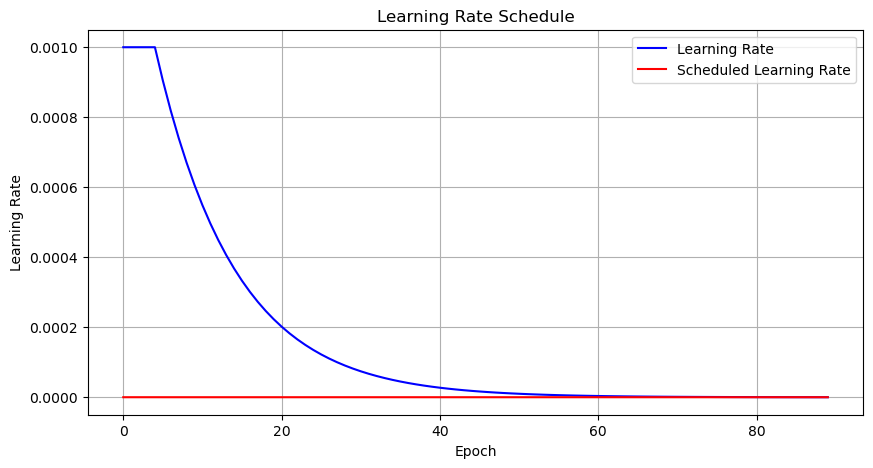

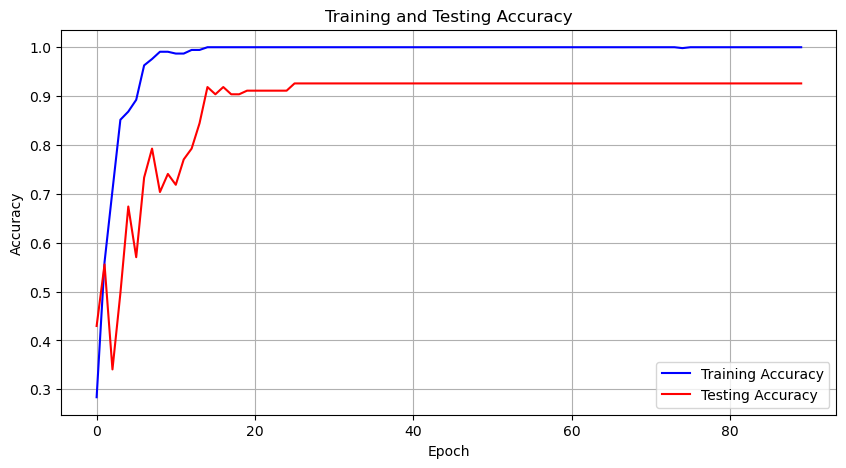

5/5 [==============================] - 74s 174ms/step


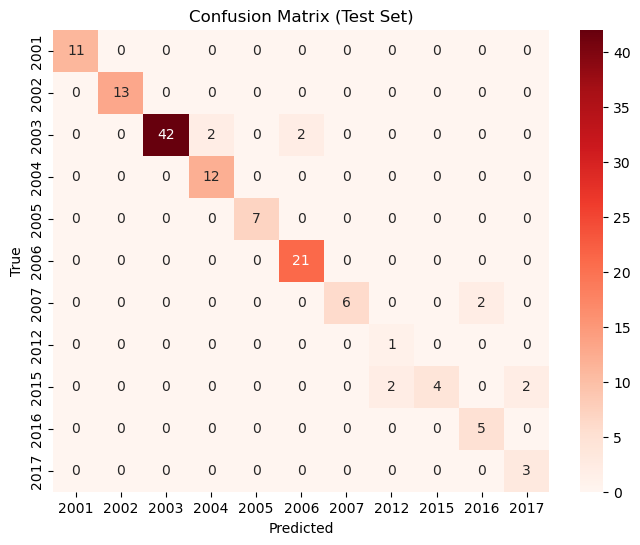

5/5 [==============================] - 2s 328ms/step - loss: 0.4186 - accuracy: 0.9259
Model Accuracy: 0.9259259104728699
Loss Accuracy: 0.41864013671875



>>>>>>>>>>>>>>>>>>>>          Testing          <<<<<<<<<<<<<<<<<<<<

Input Text: อยากรู้ว่า BMI คืออะไรเล่าให้ฟังหน่อย
1/1 [==============================] - 0s 358ms/step
LSTM: 0.9066587686538696
Predicted Class: 2002
------------------------------------------
Input Text: จากเกณฑ์ของ bmi ถ้าไม่เป็นตามนั้นจะไม่ดียังไง
1/1 [==============================] - 2s 2s/step
LSTM: 0.9996762275695801
Predicted Class: 2002
------------------------------------------
Input Text: น้ำหนัก 80 สูง 150
1/1 [==============================] - 1s 1s/step
LSTM: 0.7106562852859497
Predicted Class: Can't answer
------------------------------------------
Input Text: เป็นโควิดเมื่อวานอนาคตจะอ้วนไหม
1/1 [==============================] - 1s 720ms/step
LSTM: 0.642912745475769
Predicted Class: Can't answer
------------------------------------------
Input Text

INFO:tensorflow:Assets written to: class2/class2-LSTM\assets


In [25]:
train_test_model(model_type_input, "Adam", grouping_method, True)

### Bi-LSTM (Bidirectional Long Short-Term Memory)

In [29]:
model_type_input = "bi-LSTM"

#### 1. Adam

>>>>>>>>>>>>>>>>>>>>          Adam          <<<<<<<<<<<<<<<<<<<<

Vocabulary Size: 562
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 18, 50)            28100     
                                                                 
 bidirectional_2 (Bidirecti  (None, 18, 1024)          2306048   
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 18, 1024)          0         
                                                                 
 batch_normalization_3 (Bat  (None, 18, 1024)          4096      
 chNormalization)                                                
                                                                 
 bidirectional_3 (Bidirecti  (None, 512)               2623488   
 onal)                           

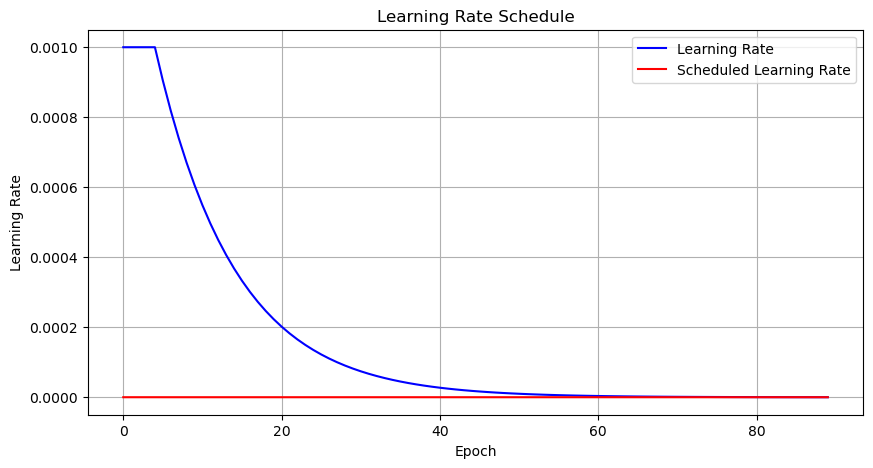

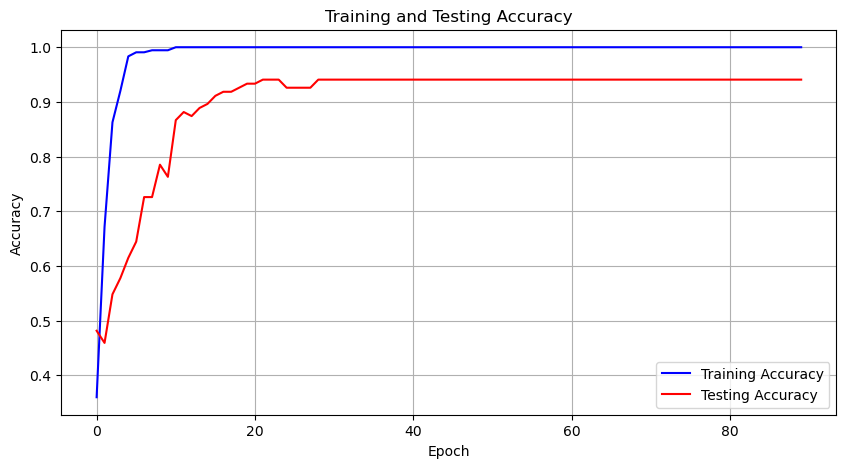

5/5 [==============================] - 47s 358ms/step


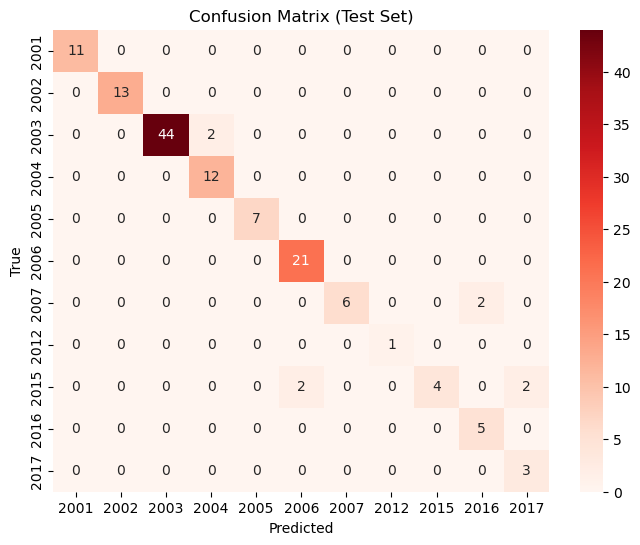

5/5 [==============================] - 2s 381ms/step - loss: 0.3640 - accuracy: 0.9407
Model Accuracy: 0.9407407641410828
Loss Accuracy: 0.36403003334999084



>>>>>>>>>>>>>>>>>>>>          Testing          <<<<<<<<<<<<<<<<<<<<

Input Text: อยากรู้ว่า BMI คืออะไรเล่าให้ฟังหน่อย
1/1 [==============================] - 1s 539ms/step
bi-LSTM: 0.9912182688713074
Predicted Class: 2007
------------------------------------------
Input Text: จากเกณฑ์ของ bmi ถ้าไม่เป็นตามนั้นจะไม่ดียังไง
1/1 [==============================] - 0s 113ms/step
bi-LSTM: 0.6711127161979675
Predicted Class: Can't answer
------------------------------------------
Input Text: น้ำหนัก 80 สูง 150
1/1 [==============================] - 0s 414ms/step
bi-LSTM: 0.9972333312034607
Predicted Class: 2001
------------------------------------------
Input Text: เป็นโควิดเมื่อวานอนาคตจะอ้วนไหม
1/1 [==============================] - 1s 829ms/step
bi-LSTM: 0.8756136298179626
Predicted Class: 2016
---------------------------------------

INFO:tensorflow:Assets written to: class2/class2-bi-LSTM\assets


In [30]:
train_test_model(model_type_input, "Adam", grouping_method, True)

## Bigram

In [ ]:
grouping_method = "Bigram"

### Fully Connected

In [ ]:
model_type_input = "FC"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

### RNN (Recurrent Neural Network)

In [ ]:
model_type_input = "RNN"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

### LSTM (Long Short-Term Memory)

In [ ]:
model_type_input = "LSTM"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

### Bi-LSTM (Bidirectional Long Short-Term Memory)

In [ ]:
model_type_input = "bi-LSTM"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

## Bigram Interpolation

In [ ]:
grouping_method = "Bigram Interpolation"

### Fully Connected

In [ ]:
model_type_input = "FC"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

### RNN (Recurrent Neural Network)

In [ ]:
model_type_input = "RNN"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

### LSTM (Long Short-Term Memory)

In [ ]:
model_type_input = "LSTM"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)

### Bi-LSTM (Bidirectional Long Short-Term Memory)

In [ ]:
model_type_input = "bi-LSTM"

#### 1. Adam

In [ ]:
train_test_model(model_type_input, "Adam", grouping_method, False)